In [1]:
#Importing all Packages
import json as json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import csv
import seaborn as sns
import datetime

In [2]:
#Opening data and loading JSON
with open ('visit_utah_updated_01_19.json', mode='r', encoding='utf-8') as read_file:
    data = json.loads(read_file.read(), encoding = 'utf-8') 

In [3]:
#Read in CSV if desired
data1 = pd.read_csv('utahdata.csv')

In [4]:
#Normalizing JSON data using build in python function
df = json_normalize(data)

In [5]:
#Rename to shorten columns. Print list of column names to use
df = df.rename(index=str, columns={"metadata.hashtags": "hashtags", "metadata.imageColors": "colors", "metadata.imagePHash": "pHash", "extCreatedAt": "CreatedDT", "metadata.imageObjects": "Objects", "metadata.imageTags": "Tags", "metadata.imgHeight": "Height", "metadata.imgWidth": "Width", "metadata.keywords": "Keywords", "metadata.language": "language"})
list(df)

['CreatedDT',
 'extPostId',
 'hashtags',
 'colors',
 'Objects',
 'pHash',
 'Tags',
 'Height',
 'Width',
 'Keywords',
 'language',
 'nComments',
 'nFollowers',
 'nLikes',
 'pageName',
 'postLink',
 'rawText']

In [6]:
#Engagement metric calculation
df['engagement_rate'] = ((df['nComments'] + df['nLikes']) / df['nFollowers']) * 100

In [7]:
df['date_series'] = pd.to_datetime(df['CreatedDT'])
df['yearofpost'] = df['date_series'].dt.year
df['monthofpost'] = df['date_series'].dt.month
df['hourofpost'] = df['date_series'].dt.hour
df['quarterofpost'] = df['date_series'].dt.quarter

In [8]:
#Hashtag work: Expand out hashtags from list to work on them. Each hashtag will go into its own column

# expand df.tags into its own dataframe
tags = df['hashtags'].apply(pd.Series)
# rename each variable is tags
tags = tags.rename(columns = lambda x : 'hashtag_' + str(x))
# join the tags dataframe back to the original dataframe
df = pd.concat([df[:], tags[:]], axis=1)

In [9]:
#Object work: Expand out object from list to work on them. Each object will go into its own column

# expand df.tags into its own dataframe
tags = df['Objects'].apply(pd.Series)
# rename each variable is tags
tags = tags.rename(columns = lambda x : 'object_' + str(x))

#Dict to columns this needs a loop bu I can't figure it out
tag1 = tags['object_0'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_0_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_1'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_1_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_2'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_2_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_3'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_3_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_4'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_4_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_5'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_5_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_6'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_6_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_7'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_7_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_8'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_8_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_9'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_9_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)
tag1 = tags['object_10'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'object_10_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)

C:\Users\Dominick\Anaconda3Install\lib\site-packages\pandas\core\indexes\api.py:57: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
C:\Users\Dominick\Anaconda3Install\lib\site-packages\pandas\core\indexes\api.py:87: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


In [10]:
#Colors work: Expand out colors from list to work on them. Each colors will go into its own column

# expand df.tags into its own dataframe
tags = df['colors'].apply(pd.Series)
# rename each variable is tags
tags = tags.rename(columns = lambda x : 'colors_' + str(x))

#Dict to columns this needs a loop but I can't figure it out
tag1 = tags['colors_0'].apply(pd.Series)
tag1 = tag1.rename(columns = lambda x : 'colors_0_' + str(x))
df = pd.concat([df[:], tag1[:]], axis=1)

In [11]:
list(df)

['CreatedDT',
 'extPostId',
 'hashtags',
 'colors',
 'Objects',
 'pHash',
 'Tags',
 'Height',
 'Width',
 'Keywords',
 'language',
 'nComments',
 'nFollowers',
 'nLikes',
 'pageName',
 'postLink',
 'rawText',
 'engagement_rate',
 'date_series',
 'yearofpost',
 'monthofpost',
 'hourofpost',
 'quarterofpost',
 'hashtag_0',
 'hashtag_1',
 'hashtag_2',
 'hashtag_3',
 'hashtag_4',
 'hashtag_5',
 'hashtag_6',
 'hashtag_7',
 'hashtag_8',
 'hashtag_9',
 'hashtag_10',
 'hashtag_11',
 'hashtag_12',
 'hashtag_13',
 'object_0_conf',
 'object_0_name',
 'object_0_vertexes',
 'object_0_0',
 'object_1_conf',
 'object_1_name',
 'object_1_vertexes',
 'object_1_0',
 'object_2_conf',
 'object_2_name',
 'object_2_vertexes',
 'object_2_0',
 'object_3_conf',
 'object_3_name',
 'object_3_vertexes',
 'object_3_0',
 'object_4_conf',
 'object_4_name',
 'object_4_vertexes',
 'object_4_0',
 'object_5_conf',
 'object_5_name',
 'object_5_vertexes',
 'object_5_0',
 'object_6_conf',
 'object_6_name',
 'object_6_vertexe

In [12]:
#See if the PageName is one of the hashtags (1 if true, 0 if not). 
#Get list of page names
PageNames = df['pageName'].unique()
#Use conditions for all hashtag columns, create a new column and assign values 1 if true, 0 if false
conditions = [
    (df['hashtag_0'].isin(PageNames)),
    (df['hashtag_1'].isin(PageNames)),
    (df['hashtag_2'].isin(PageNames)),
    (df['hashtag_3'].isin(PageNames)),
    (df['hashtag_4'].isin(PageNames)),
    (df['hashtag_5'].isin(PageNames)),
    (df['hashtag_6'].isin(PageNames)),
    (df['hashtag_7'].isin(PageNames)),
    (df['hashtag_8'].isin(PageNames)),
    (df['hashtag_9'].isin(PageNames)),
    (df['hashtag_10'].isin(PageNames)),
    (df['hashtag_11'].isin(PageNames)),
    (df['hashtag_12'].isin(PageNames)),
    (df['hashtag_13'].isin(PageNames))]
choices = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
df['hashtag_pagename'] = np.select(conditions, choices, default=0)

In [13]:
#See if the this post is related to the Christmas/holiday season
#Create a list of possible Christmas/holiday hasthags
Holiday = ['santa', 'christmas', 'holiday', 'happyholidays', 'merrychristmas', 'winterwonderland', 'happynewyear', 'newyear', 'holidaycelebration', 'giving', 'holidayvacation', 'presents', 'christmaseve', 'christmasday', 'newyearseve', 'newyearsday']
#Use conditions for all hashtag columns, create a new column and assign values 1 if true, 0 if false
conditions = [
    (df['hashtag_0'].isin(Holiday)),
    (df['hashtag_1'].isin(Holiday)),
    (df['hashtag_2'].isin(Holiday)),
    (df['hashtag_3'].isin(Holiday)),
    (df['hashtag_4'].isin(Holiday)),
    (df['hashtag_5'].isin(Holiday)),
    (df['hashtag_6'].isin(Holiday)),
    (df['hashtag_7'].isin(Holiday)),
    (df['hashtag_8'].isin(Holiday)),
    (df['hashtag_9'].isin(Holiday)),
    (df['hashtag_10'].isin(Holiday)),
    (df['hashtag_11'].isin(Holiday)),
    (df['hashtag_12'].isin(Holiday)),
    (df['hashtag_13'].isin(Holiday))]
choices = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
df['hashtag_holidayseason'] = np.select(conditions, choices, default=0)

In [14]:
#Winter Sports Hashtags: See if this post is realted to winter sports
#Create a list of possible winter sport hasthags
WinterSports = ['skiing', 'snowmodile', 'ski', 'skiutah', 'skicolorado', 'mountains', 'snow', 'powder', 'sleding', 'wintersports', 'skivermont', 'internationalmountainday']
#Use conditions for all hashtag columns, create a new column and assign values 1 if true, 0 if false
conditions = [
    (df['hashtag_0'].isin(WinterSports)),
    (df['hashtag_1'].isin(WinterSports)),
    (df['hashtag_2'].isin(WinterSports)),
    (df['hashtag_3'].isin(WinterSports)),
    (df['hashtag_4'].isin(WinterSports)),
    (df['hashtag_5'].isin(WinterSports)),
    (df['hashtag_6'].isin(WinterSports)),
    (df['hashtag_7'].isin(WinterSports)),
    (df['hashtag_8'].isin(WinterSports)),
    (df['hashtag_9'].isin(WinterSports)),
    (df['hashtag_10'].isin(WinterSports)),
    (df['hashtag_11'].isin(WinterSports)),
    (df['hashtag_12'].isin(WinterSports)),
    (df['hashtag_13'].isin(WinterSports))]
choices = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
df['hashtag_wintersports'] = np.select(conditions, choices, default=0)

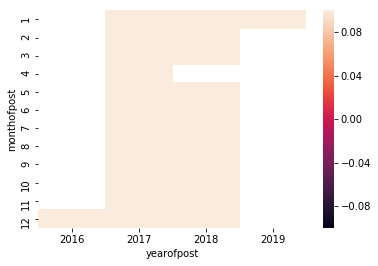

In [23]:
#Pivot and HeatMap
#Based only on Month and Year
MonthandYear = pd.pivot_table(df, values='engagement_rate',index='monthofpost', columns='yearofpost')
ax1 = sns.heatmap(MonthandYear)

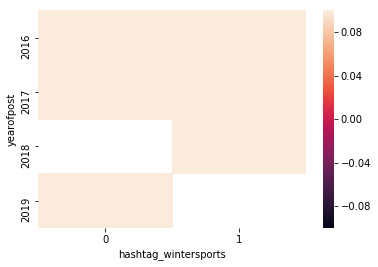

In [26]:
#Pivot and HeatMap
#Based on Year and Wintersport Hashtag
WinterSport = pd.pivot_table(df, values='engagement_rate',index='yearofpost', columns='hashtag_wintersports')
ax1 = sns.heatmap(WinterSport)